In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from datetime import datetime
import plotly.express as px
import plotly.graph_objs as go

ModuleNotFoundError: No module named 'plotly'

In [ ]:
df=pd.read_excel('Booking_Data.xlsx')
df.head()

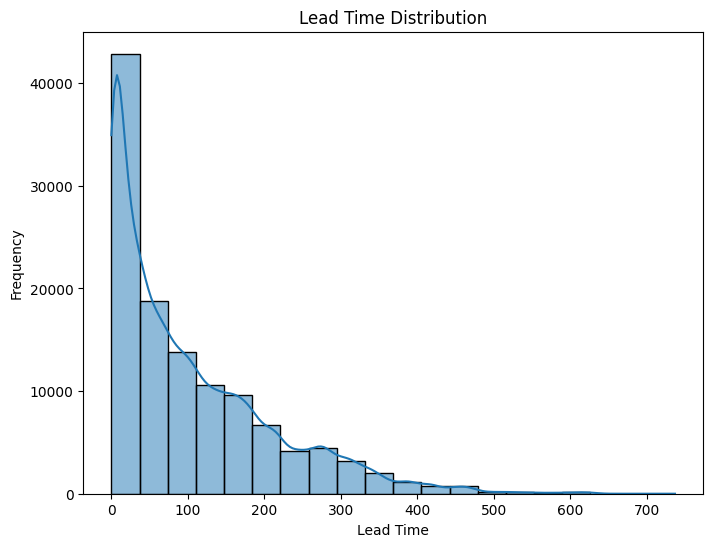

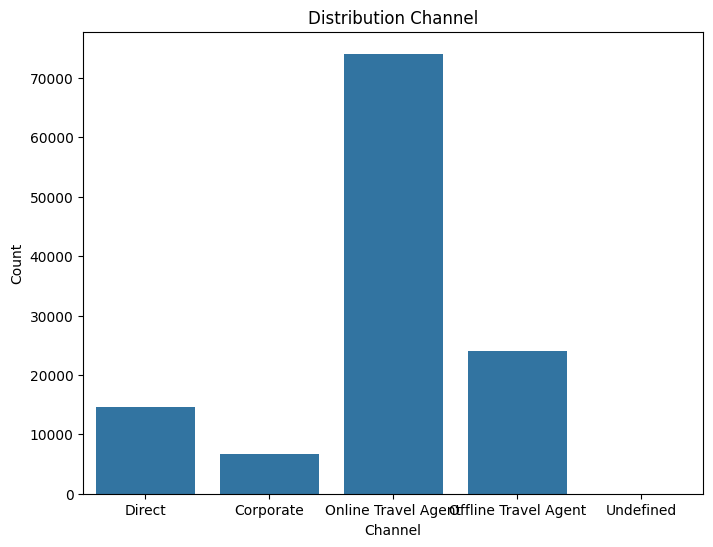

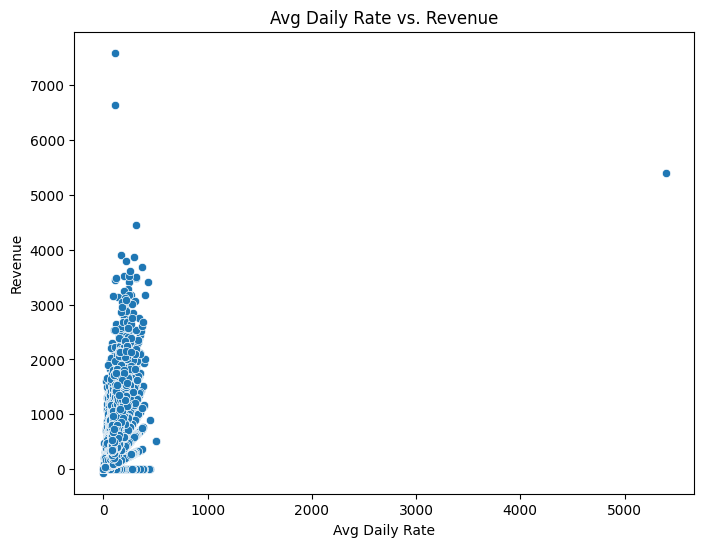

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Lead Time'], bins=20, kde=True)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Distribution Channel')
plt.title('Distribution Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Avg Daily Rate', y='Revenue')
plt.title('Avg Daily Rate vs. Revenue')
plt.xlabel('Avg Daily Rate')
plt.ylabel('Revenue')
plt.show()


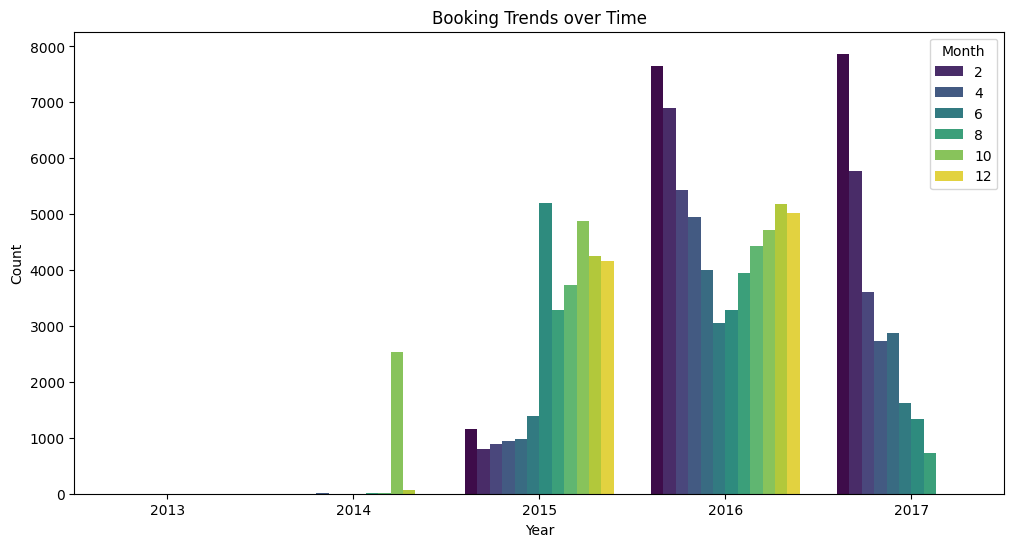

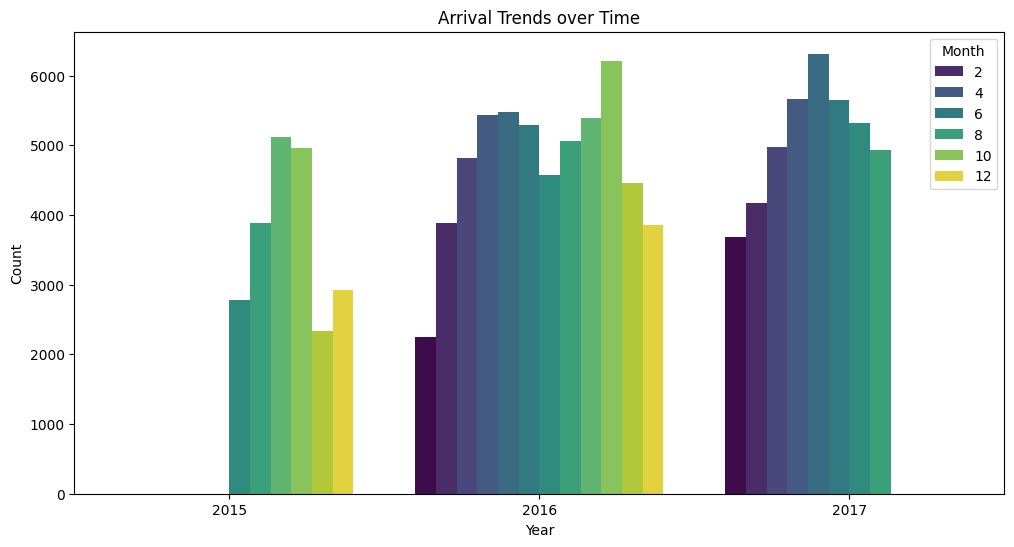

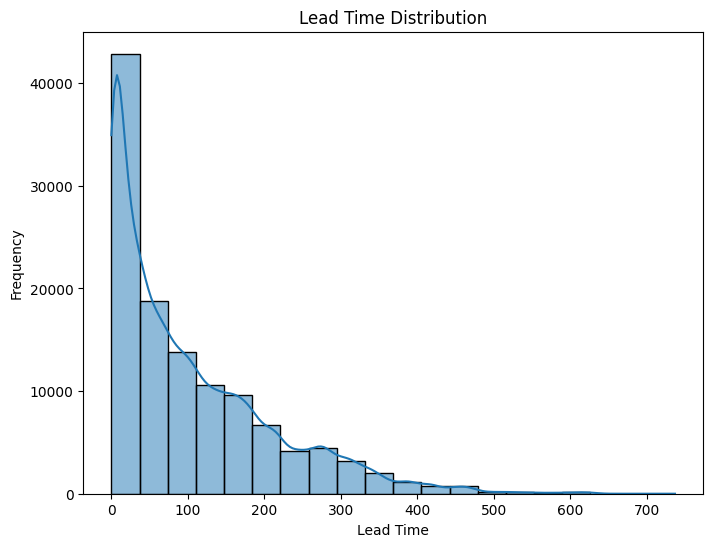

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


df['Booking Date'] = pd.to_datetime(df['Booking Date'])
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'])
df['Booking Year'] = df['Booking Date'].dt.year
df['Booking Month'] = df['Booking Date'].dt.month
df['Arrival Year'] = df['Arrival Date'].dt.year
df['Arrival Month'] = df['Arrival Date'].dt.month
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Booking Year', hue='Booking Month', palette='viridis')
plt.title('Booking Trends over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Month')
plt.show()
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Arrival Year', hue='Arrival Month', palette='viridis')
plt.title('Arrival Trends over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Month')
plt.show()
plt.figure(figsize=(8, 6))
sns.histplot(df['Lead Time'], bins=20, kde=True)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()


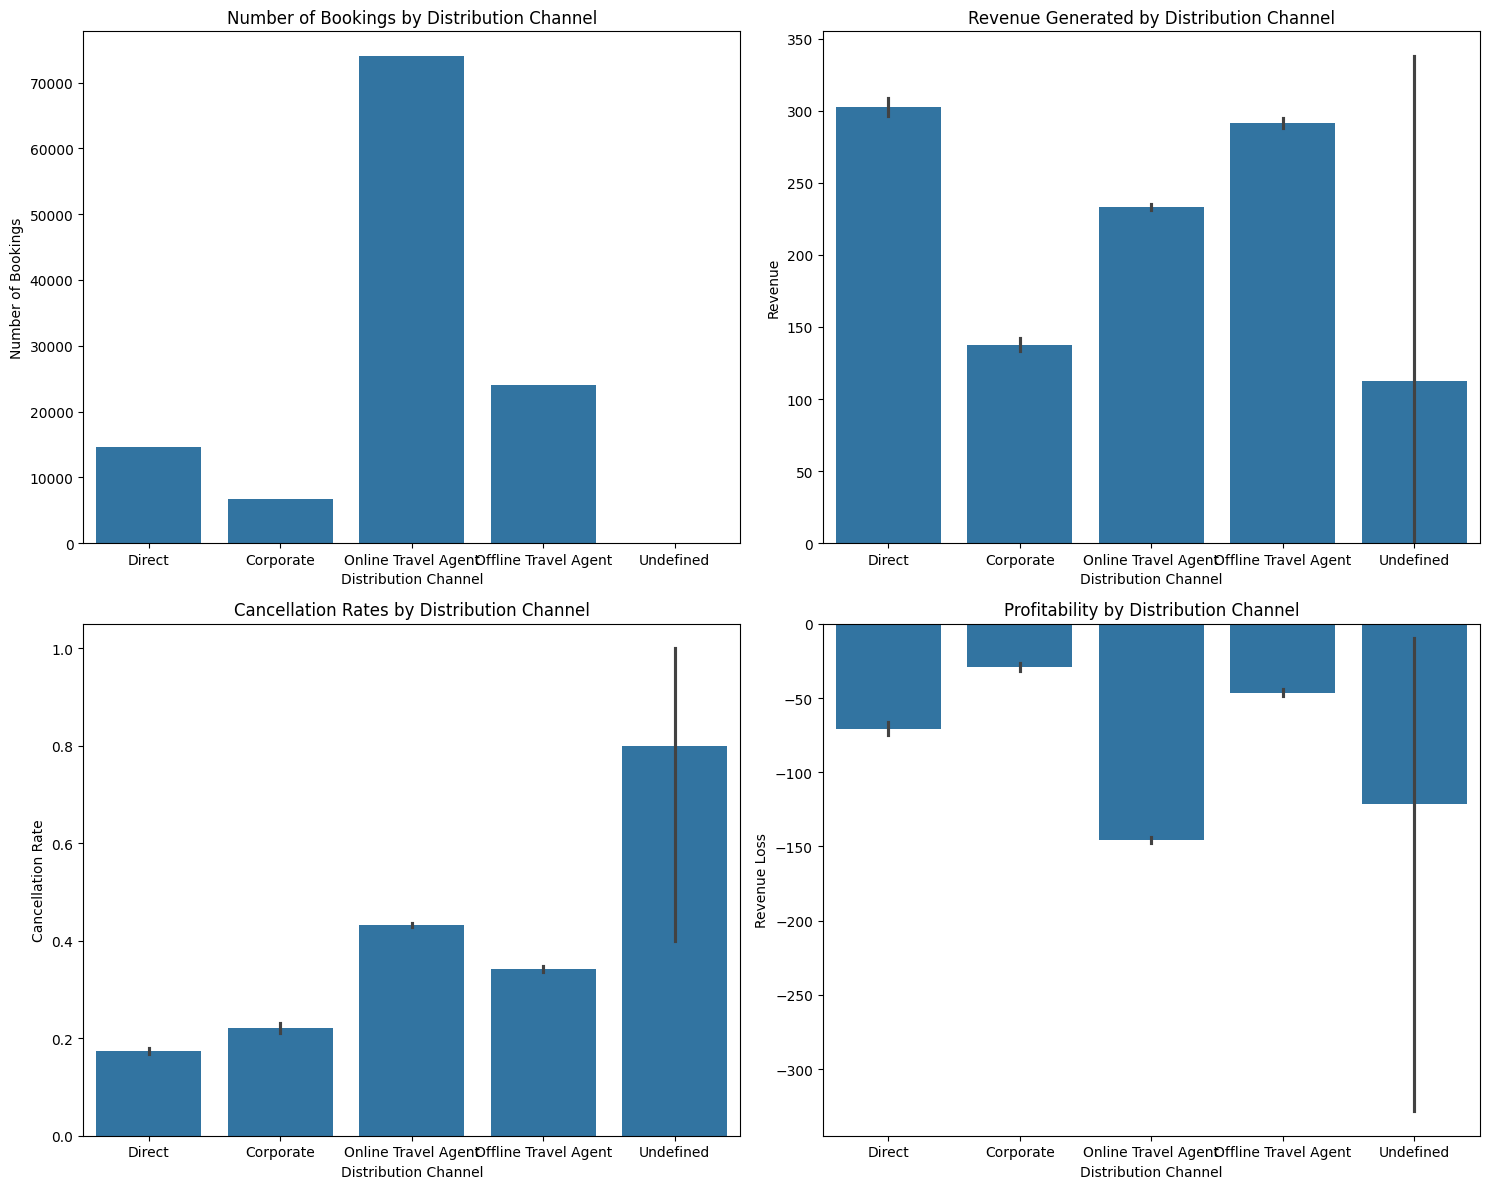

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
sns.countplot(data=df, x='Distribution Channel', ax=axs[0, 0])
axs[0, 0].set_title('Number of Bookings by Distribution Channel')
axs[0, 0].set_xlabel('Distribution Channel')
axs[0, 0].set_ylabel('Number of Bookings')
sns.barplot(data=df, x='Distribution Channel', y='Revenue', ax=axs[0, 1])
axs[0, 1].set_title('Revenue Generated by Distribution Channel')
axs[0, 1].set_xlabel('Distribution Channel')
axs[0, 1].set_ylabel('Revenue')
sns.barplot(data=df, x='Distribution Channel', y='Cancelled (0/1)', ax=axs[1, 0])
axs[1, 0].set_title('Cancellation Rates by Distribution Channel')
axs[1, 0].set_xlabel('Distribution Channel')
axs[1, 0].set_ylabel('Cancellation Rate')
sns.barplot(data=df, x='Distribution Channel', y='Revenue Loss', ax=axs[1, 1])
axs[1, 1].set_title('Profitability by Distribution Channel')
axs[1, 1].set_xlabel('Distribution Channel')
axs[1, 1].set_ylabel('Revenue Loss')
plt.tight_layout()
plt.show()



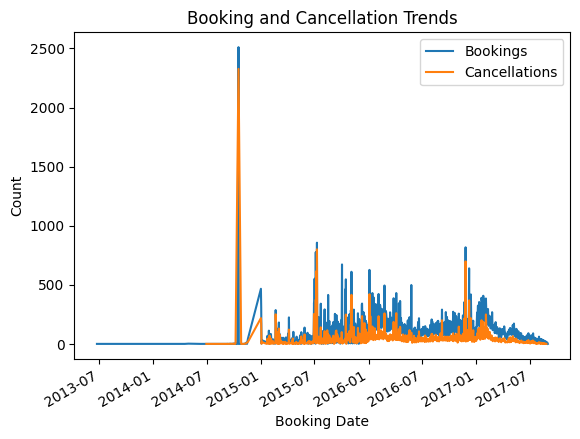

In [7]:

df['Booking Date'] = pd.to_datetime(df['Booking Date'])
booking_counts = df['Booking Date'].value_counts().sort_index()
booking_counts.plot(x='Booking Date', y='Booking Count', label='Bookings')
cancelled_counts = df[df['Cancelled (0/1)'] == 1]['Booking Date'].value_counts().sort_index()
cancelled_counts.plot(x='Booking Date', y='Cancellation Count', label='Cancellations')
plt.xlabel('Booking Date')
plt.ylabel('Count')
plt.title('Booking and Cancellation Trends')
plt.legend()
plt.show()



In [11]:
df["Booking Date"] = pd.to_datetime(df["Booking Date"])
df["Year-Month"] = df["Year-Month"].astype(str)
booking_trends = df.groupby("Year-Month").size().reset_index(name='Bookings')
fig = px.line(booking_trends, x="Year-Month", y="Bookings", title="Booking Trends Over Time",
              labels={"Year-Month": "Month", "Bookings": "Number of Bookings"},
              markers=True)
fig.update_xaxes(dtick="M1", tickformat="%b\n%Y", title="Month")
fig.update_layout(xaxis_title="Month", yaxis_title="Number of Bookings")

fig.show()


In [17]:
bookings_by_country

Country  Bookings
128          Portugal     48590
165    United Kingdom     12129
55             France     10415
148             Spain      8568
60            Germany      7287
..                ...       ...
143      Sierra Leone         1
115     New Caledonia         1
56   French Polynesia         1
53               Fiji         1
87           Kiribati         1

[174 rows x 2 columns]

In [44]:

custom_color_scale = [
    [0.0, "rgba(255,224,189,1)"], 
    [0.5, "rgba(244,164,96,1)"],  
    [1.0, "rgba(139,69,19,1)"]  
]
fig = px.choropleth(bookings_by_country,
                    locations='Country',  
                    locationmode='country names',  
                    color=np.log10(bookings_by_country['Bookings']), 
                    color_continuous_scale=custom_color_scale,  
                    title='Global Booking Distribution',  
                    hover_name='Country',
                    hover_data='Bookings', 
                    labels={'color': 'Log10(Bookings)'})  
fig.show()


In [29]:
import plotly.express as px
fig = px.histogram(df, x='Lead Time',
                   title='Distribution of Lead Times for Bookings',
                   labels={'Lead Time': 'Lead Time (days)'},
                   opacity=0.8,  
                   color_discrete_sequence=['indianred'])  

fig.update_layout(xaxis_title="Lead Time (days)",
                  yaxis_title="Number of Bookings",
                  bargap=0.2)

fig.show()


In [33]:
import plotly.express as px
fig = px.box(df, x='Distribution Channel', y='Avg Daily Rate',
             title='Average Daily Rate (ADR) by Distribution Channel',
             labels={'Avg Daily Rate': 'ADR ($)', 'Distribution Channel': 'Distribution Channel'},
             color='Distribution Channel') 
fig.update_layout(xaxis_title="Distribution Channel",
                  yaxis_title="Average Daily Rate (ADR) $",
                  boxmode='group',
                  yaxis=dict(range=[0, 500]))  

fig.show()


In [36]:

df['Arrival Date'] = pd.to_datetime(df['Arrival Date'])
revenue_loss_over_time = df.groupby(df['Arrival Date'].dt.to_period('M'))['Revenue Loss'].sum().reset_index()
revenue_loss_over_time['Arrival Date'] = revenue_loss_over_time['Arrival Date'].dt.to_timestamp()
fig = px.line(revenue_loss_over_time, x='Arrival Date', y='Revenue Loss',
              title='Revenue Loss Over Time',
              labels={'Revenue Loss': 'Revenue Loss ($)', 'Arrival Date': 'Date'},
              markers=True)
fig.update_layout(xaxis_title='Date',
                  yaxis_title='Revenue Loss ($)',
                  xaxis=dict(tickformat='%b\n%Y')) 

fig.show()

# "This graph shows us how much money our hotel has not been able to earn from expected bookings. This might include situations like guests cancelling their rooms, or rooms that remained unbooked. The vertical axis shows the amount of revenue lost in dollars, and the horizontal axis represents the time from July 2015 to July 2017.

# At the start of the graph in July 2015, we were losing about $200,000 per month. As time went on, the amount of revenue we were losing started to increase, reaching up to $600,000 by early 2016. This was a challenging period for us.

# However, after that peak, we see some ups and downs, but the overall trend is that the amount of revenue we're losing has been going down. By July 2017, our monthly revenue loss decreased significantly to the lowest point in the graph at around $1.4 million.

# This is a good sign! It means that by the middle of 2017, we were doing much better at keeping our rooms booked and reducing cancellations. This improvement could be due to many factors, like better marketing, more competitive pricing, improved customer service, or a stronger economy.

# In summary, while it's not great to see that we've lost revenue, the important thing is that we're on the right track and have been improving over the last two years. Our strategies to reduce these losses are showing positive results, and we should continue in this direction."

# Remember to provide context for any strategies or actions that have been implemented during this time frame to help the audience understand what led to the improvements seen in the graph.

In [37]:

df['Arrival Date'] = pd.to_datetime(df['Arrival Date'])
revenue_over_time = df.groupby(df['Arrival Date'].dt.to_period('M'))['Revenue'].sum().reset_index()
revenue_over_time['Arrival Date'] = revenue_over_time['Arrival Date'].dt.to_timestamp()
fig = px.line(revenue_over_time, x='Arrival Date', y='Revenue',
              title='Revenue Over Time',
              labels={'Revenue': 'Revenue ($)', 'Arrival Date': 'Date'},
              markers=True)
fig.update_layout(xaxis_title='Date',
                  yaxis_title='Revenue ($)',
                  xaxis=dict(tickformat='%b\n%Y'))
fig.show()


In [40]:

df['Arrival Date'] = pd.to_datetime(df['Arrival Date'])
summary_over_time = df.groupby(df['Arrival Date'].dt.to_period('M')).agg({'Revenue': 'sum', 'Revenue Loss': 'sum'}).reset_index()
summary_over_time['Arrival Date'] = summary_over_time['Arrival Date'].dt.to_timestamp()
fig = go.Figure()
fig.add_trace(go.Line(x=summary_over_time['Arrival Date'], y=summary_over_time['Revenue'],
                      name='Revenue', marker=dict(color='green')))
fig.add_trace(go.Line(x=summary_over_time['Arrival Date'], y=summary_over_time['Revenue Loss'],
                      name='Revenue Loss', marker=dict(color='red')))
fig.update_layout(title='Revenue and Revenue Loss Over Time',
                  xaxis_title='Date',
                  yaxis_title='Amount ($)',
                  xaxis=dict(tickformat='%b\n%Y'))

fig.show()


c:\Users\g49894816\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


c:\Users\g49894816\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [43]:
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'])
df['Net Revenue'] = df['Revenue'] + df['Revenue Loss']
summary_over_time = df.groupby(df['Arrival Date'].dt.to_period('M')).agg({
    'Revenue': 'sum',
    'Revenue Loss': 'sum',
    'Net Revenue': 'sum'
}).reset_index()
summary_over_time['Arrival Date'] = summary_over_time['Arrival Date'].dt.to_timestamp()
fig = px.line(summary_over_time, x='Arrival Date',
              y=['Revenue', 'Revenue Loss', 'Net Revenue'],
              title='Revenue and Net Revenue Over Time',
              labels={'value': 'Dollars ($)', 'variable': 'Type', 'Arrival Date': 'Date'},
              markers=True)
fig.update_layout(xaxis_title='Date',
                  yaxis_title='Dollars ($)',
                  xaxis=dict(tickformat='%b\n%Y'))
fig.show()
